In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
%matplotlib inline
import seaborn as sns
#sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, mutual_info_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the data downloaded from World Bank Data

df = pd.read_csv('API_19_DS2_en_csv_v2_4151283.csv', skiprows=4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,...,44059.000000,44351.000000,44666.000000,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.544810,...,0.543931,0.660561,0.707733,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,...,102565.000000,103165.000000,103776.000000,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017,NaN


In [3]:
# Check for the unique indicators in the dataset

df['Indicator Name'].unique()

array(['Urban population (% of total population)', 'Urban population',
       'Urban population growth (annual %)', 'Population, total',
       'Population growth (annual %)',
       'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Community health workers (per 1,000 people)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Primary completion rate, total (% of relevant age group)',
       'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'CPIA public sector management and institutions cluster average (1=low to 6=high)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Terrestrial and marine protected areas (% of total territorial area)',
       'Marine protected areas (% of territorial waters)',
       'Terrestrial protected 

In [4]:
# Extract CO2 Emission records

df_co2 = df[df['Indicator Name']=='CO2 emissions (kg per PPP $ of GDP)']
df_co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
40,Aruba,ABW,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Africa Eastern and Southern,AFE,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311551,0.302708,0.293408,0.275935,0.264321,0.256016,0.243090,NaN,NaN,NaN
192,Afghanistan,AFG,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.175139,0.130843,0.113093,0.111232,0.105424,0.098779,0.096105,NaN,NaN,NaN
268,Africa Western and Central,AFW,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.130123,0.125749,0.120623,0.116140,0.116235,0.115763,0.121826,NaN,NaN,NaN
344,Angola,AGO,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.162526,0.164210,0.157149,0.171844,0.172837,0.141476,0.124984,NaN,NaN,NaN


In [5]:
# Checking the number of rows and columns in the dataset

df_co2.shape

(266, 66)

In [6]:
# Ectract annual population growth records

df_pop = df[df['Indicator Name']=='Population growth (annual %)']
df_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017,NaN
80,Africa Eastern and Southern,AFE,Population growth (annual %),SP.POP.GROW,NaN,2.539822,2.575182,2.606839,2.633213,2.656488,...,2.763426,2.761496,2.750400,2.732598,2.712218,2.690902,2.665620,2.636666,2.605427,NaN
156,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NaN,1.898499,1.965805,2.029830,2.090208,2.147639,...,3.407600,3.494592,3.355602,3.077054,2.778035,2.547833,2.384309,2.313073,2.303812,NaN
232,Africa Western and Central,AFW,Population growth (annual %),SP.POP.GROW,2.034308,2.085972,2.133725,2.173361,2.202845,2.226134,...,2.763803,2.753564,2.745542,2.738332,2.730332,2.719330,2.704168,2.684152,2.660902,NaN
308,Angola,AGO,Population growth (annual %),SP.POP.GROW,NaN,1.392891,1.383296,1.256405,0.973970,0.618450,...,3.597755,3.551997,3.497447,3.438869,3.378269,3.322158,3.276145,3.242914,3.218530,NaN


In [7]:
# Read in the dataset containing countries

nations = pd.read_csv('all_countries.csv')
nations.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [8]:
# Rename and select neccessary columns

nations = nations.rename(columns={'name':'Country Name', 'alpha-3':'Country Code', 'region':'Region', 'sub-region':'Sub-Region'}, inplace=False)
nations = nations[['Country Name', 'Country Code', 'Region', 'Sub-Region']]
nations.head()

,Country Name,Country Code,Region,Sub-Region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [9]:
# Merge datasets
merger1 = nations.merge(df_co2, on = ['Country Name', 'Country Code'])
merger2 = nations.merge(df_pop, on=['Country Name', 'Country Code'])
merger1.head()

,Country Name,Country Code,Region,Sub-Region,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Asia,Southern Asia,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,...,0.175139,0.130843,0.113093,0.111232,0.105424,0.098779,0.096105,NaN,NaN,NaN
1,Albania,ALB,Europe,Southern Europe,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,...,0.150015,0.156516,0.160471,0.150956,0.141911,0.152602,0.143704,NaN,NaN,NaN
2,Algeria,DZA,Africa,Northern Africa,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,...,0.254640,0.260870,0.274255,0.305788,0.304105,0.298682,0.301568,NaN,NaN,NaN
3,American Samoa,ASM,Oceania,Polynesia,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Europe,Southern Europe,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Check the dataset

merger2.head()

,Country Name,Country Code,Region,Sub-Region,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Asia,Southern Asia,Population growth (annual %),SP.POP.GROW,NaN,1.898499,1.965805,2.029830,...,3.407600,3.494592,3.355602,3.077054,2.778035,2.547833,2.384309,2.313073,2.303812,NaN
1,Albania,ALB,Europe,Southern Europe,Population growth (annual %),SP.POP.GROW,NaN,3.120855,3.056731,2.953749,...,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,-0.574207,NaN
2,Algeria,DZA,Africa,Northern Africa,Population growth (annual %),SP.POP.GROW,NaN,2.487129,2.469981,2.490050,...,1.951464,2.002704,2.033587,2.045372,2.051352,2.044909,2.007399,1.933983,1.836534,NaN
3,American Samoa,ASM,Oceania,Polynesia,Population growth (annual %),SP.POP.GROW,NaN,2.347157,3.063488,3.619112,...,-0.154365,0.086187,0.132726,0.026882,-0.120131,-0.219117,-0.280884,-0.269019,-0.208128,NaN
4,Andorra,AND,Europe,Southern Europe,Population growth (annual %),SP.POP.GROW,NaN,6.969856,6.730368,6.470513,...,-1.589924,-2.030744,-1.946518,-1.552135,-0.898981,-0.386281,0.014285,0.179042,0.154134,NaN


In [11]:
# Check the dataset

merger2.head()

,Country Name,Country Code,Region,Sub-Region,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Asia,Southern Asia,Population growth (annual %),SP.POP.GROW,NaN,1.898499,1.965805,2.029830,...,3.407600,3.494592,3.355602,3.077054,2.778035,2.547833,2.384309,2.313073,2.303812,NaN
1,Albania,ALB,Europe,Southern Europe,Population growth (annual %),SP.POP.GROW,NaN,3.120855,3.056731,2.953749,...,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,-0.574207,NaN
2,Algeria,DZA,Africa,Northern Africa,Population growth (annual %),SP.POP.GROW,NaN,2.487129,2.469981,2.490050,...,1.951464,2.002704,2.033587,2.045372,2.051352,2.044909,2.007399,1.933983,1.836534,NaN
3,American Samoa,ASM,Oceania,Polynesia,Population growth (annual %),SP.POP.GROW,NaN,2.347157,3.063488,3.619112,...,-0.154365,0.086187,0.132726,0.026882,-0.120131,-0.219117,-0.280884,-0.269019,-0.208128,NaN
4,Andorra,AND,Europe,Southern Europe,Population growth (annual %),SP.POP.GROW,NaN,6.969856,6.730368,6.470513,...,-1.589924,-2.030744,-1.946518,-1.552135,-0.898981,-0.386281,0.014285,0.179042,0.154134,NaN


In [12]:
# Check the number of rows and columns

merger2.shape

(184, 68)

In [13]:
# Drop un-needed columns

merger1 = merger1.drop(['Indicator Code', 'Indicator Name'], axis=1, inplace=False)
merger2 = merger2.drop(['Indicator Code', 'Indicator Name'], axis=1, inplace=False)

In [14]:
# Melt (unpivot) the dataframe

data1 = merger1.melt(id_vars=['Country Name', 'Country Code', 'Region', 'Sub-Region'], var_name='Year', value_name='CO2 emissions (kg per PPP $ of GDP)')
data1.head()

,Country Name,Country Code,Region,Sub-Region,Year,CO2 emissions (kg per PPP $ of GDP)
0,Afghanistan,AFG,Asia,Southern Asia,1960,NaN
1,Albania,ALB,Europe,Southern Europe,1960,NaN
2,Algeria,DZA,Africa,Northern Africa,1960,NaN
3,American Samoa,ASM,Oceania,Polynesia,1960,NaN
4,Andorra,AND,Europe,Southern Europe,1960,NaN


In [15]:
# Melt (unpivot) the dataframe

data2 = merger2.melt(id_vars=['Country Name', 'Country Code', 'Region', 'Sub-Region'], var_name='Year', value_name='Population growth (annual %)')
data2.head()

,Country Name,Country Code,Region,Sub-Region,Year,Population growth (annual %)
0,Afghanistan,AFG,Asia,Southern Asia,1960,NaN
1,Albania,ALB,Europe,Southern Europe,1960,NaN
2,Algeria,DZA,Africa,Northern Africa,1960,NaN
3,American Samoa,ASM,Oceania,Polynesia,1960,NaN
4,Andorra,AND,Europe,Southern Europe,1960,NaN


In [16]:
# Merge the dataset

data_merged = data1.merge(data2, on = ['Country Name', 'Country Code', 'Region', 'Sub-Region', 'Year'])
data_merged.head()

,Country Name,Country Code,Region,Sub-Region,Year,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
0,Afghanistan,AFG,Asia,Southern Asia,1960,NaN,NaN
1,Albania,ALB,Europe,Southern Europe,1960,NaN,NaN
2,Algeria,DZA,Africa,Northern Africa,1960,NaN,NaN
3,American Samoa,ASM,Oceania,Polynesia,1960,NaN,NaN
4,Andorra,AND,Europe,Southern Europe,1960,NaN,NaN


In [17]:
# Extract data from year 1990 and above

data_new = data_merged[data_merged['Year']>='1990']
data_new.head()

,Country Name,Country Code,Region,Sub-Region,Year,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
5520,Afghanistan,AFG,Asia,Southern Asia,1990,NaN,4.476954
5521,Albania,ALB,Europe,Southern Europe,1990,0.722433,1.799086
5522,Algeria,DZA,Africa,Northern Africa,1990,0.381303,2.566460
5523,American Samoa,ASM,Oceania,Polynesia,1990,NaN,3.125355
5524,Andorra,AND,Europe,Southern Europe,1990,NaN,3.844901


In [18]:
# Check for the percentage of missing observations in each column

data_new.isnull().mean()

Country Name                           0.000000
Country Code                           0.000000
Region                                 0.000000
Sub-Region                             0.000000
Year                                   0.000000
CO2 emissions (kg per PPP $ of GDP)    0.242357
Population growth (annual %)           0.033628
dtype: float64

In [19]:
# Replacing the missing values with the median value (to avoid adding more noise to the data)

data_1 = data_new.fillna(data_new['CO2 emissions (kg per PPP $ of GDP)'].median())
data_1 = data_new.fillna(data_new['Population growth (annual %)'].median())
data_1.head()

,Country Name,Country Code,Region,Sub-Region,Year,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
5520,Afghanistan,AFG,Asia,Southern Asia,1990,1.329227,4.476954
5521,Albania,ALB,Europe,Southern Europe,1990,0.722433,1.799086
5522,Algeria,DZA,Africa,Northern Africa,1990,0.381303,2.566460
5523,American Samoa,ASM,Oceania,Polynesia,1990,1.329227,3.125355
5524,Andorra,AND,Europe,Southern Europe,1990,1.329227,3.844901


In [20]:
# Check the number of rows and columns

data_1.shape

(5888, 7)

In [21]:
# Create functions to normalize the data

def norm(array):
    """ Returns array normalised to [0,1]. Array can be a numpy array 
    or a column of a dataframe"""

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled

def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[5:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [22]:
# Normalize the data

data_norm = norm_df(data_1)
data_norm.head()

,Country Name,Country Code,Region,Sub-Region,Year,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
5520,Afghanistan,AFG,Asia,Southern Asia,1990,0.517478,0.463091
5521,Albania,ALB,Europe,Southern Europe,1990,0.281249,0.352793
5522,Algeria,DZA,Africa,Northern Africa,1990,0.148444,0.384400
5523,American Samoa,ASM,Oceania,Polynesia,1990,0.517478,0.407420
5524,Andorra,AND,Europe,Southern Europe,1990,0.517478,0.437058


In [23]:
# Group the data by year

data_year = data_norm.groupby('Year').mean().reset_index()
data_year.head()

,Year,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
0,1990,0.285561,0.352955
1,1991,0.276292,0.348977
2,1992,0.270384,0.345228
3,1993,0.268237,0.343270
4,1994,0.262340,0.341540


In [24]:
# Check the number of rows and columns in the datas upon grouping by year

data_year.shape

(32, 3)

## Fit Exponential Curve

In [25]:
data_year['Year'] = data_year['Year'].astype(float)
data_year.head()

,Year,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
0,1990.0,0.285561,0.352955
1,1991.0,0.276292,0.348977
2,1992.0,0.270384,0.345228
3,1993.0,0.268237,0.343270
4,1994.0,0.262340,0.341540


In [26]:
co2 = data_year['CO2 emissions (kg per PPP $ of GDP)']
pop = data_year['Population growth (annual %)']
year= data_year['Year']

In [27]:
# Fit exponential curve for CO2 emission

from scipy.optimize import curve_fit

def exp_fit(x, a, b, c):
    y = a * np.exp(-b * x) + c
    return y

fit = curve_fit(exp_fit, year, co2, p0=[0.005, 0.03, 5])
fit_eq = fit[0][0]*np.exp(fit[0][1]*year+fit[0][2])

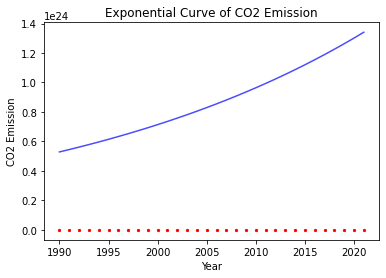

In [28]:
# Plot the curve

fig = plt.figure()
ax = fig.subplots()
ax.scatter(year, co2, color='r', s=5)
ax.plot(year, fit_eq, color='b', alpha=0.7)
ax.set_ylabel('CO2 Emission')
ax.set_xlabel('Year')

plt.title('Exponential Curve of CO2 Emission')
plt.show()

fig.savefig('Exponential Curve of CO2 Emission')

Fitting the exponential curve, we found that CO2 emission exhibits an upward trend, which indicates that CO2 emission will most likely continue to increase over the years.

In [29]:
# Fit exponential curve for population growth

from scipy.optimize import curve_fit

def exp_fit(x, a, b, c):
    y = a * np.exp(-b * x) + c
    return y

fit = curve_fit(exp_fit, year, pop, p0=[0.005, 0.03, 5])
fit_eq = fit[0][0]*np.exp(fit[0][1]*year+fit[0][2])

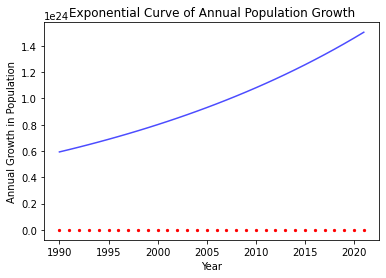

In [30]:
fig = plt.figure()
ax = fig.subplots()
ax.scatter(year, pop, color='r', s=5)
ax.plot(year, fit_eq, color='b', alpha=0.7)
ax.set_ylabel('Annual Growth in Population')
ax.set_xlabel('Year')

plt.title('Exponential Curve of Annual Population Growth')
plt.show()

fig.savefig('Exponential Curve of Annual Population Growth.png')

Fitting the exponential curve, we found that annual population growth exhibits an upward trend, which indicates that annual change in population will most likely continue to increase over the years.

## Applying clustering

In [31]:
# Group the data by Country

data_country = data_norm.groupby(['Country Name', 'Region']).mean().reset_index()
data_country.head()

,Country Name,Region,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
0,Afghanistan,Asia,0.265380,0.433290
1,Albania,Europe,0.134975,0.263823
2,Algeria,Africa,0.152289,0.352184
3,American Samoa,Oceania,0.517478,0.304159
4,Andorra,Europe,0.517478,0.330258


In [32]:
# Check the data

data_country.head()

,Country Name,Region,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
0,Afghanistan,Asia,0.265380,0.433290
1,Albania,Europe,0.134975,0.263823
2,Algeria,Africa,0.152289,0.352184
3,American Samoa,Oceania,0.517478,0.304159
4,Andorra,Europe,0.517478,0.330258


In [33]:
# Extract the data for clustering

x = data_country.iloc[:, 2:]
x.head()

,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
0,0.265380,0.433290
1,0.134975,0.263823
2,0.152289,0.352184
3,0.517478,0.304159
4,0.517478,0.330258


In [34]:
# Using the elbow approach, find the optimized number of clusters in the available dataset

wcss = [] 
for i in range(1, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

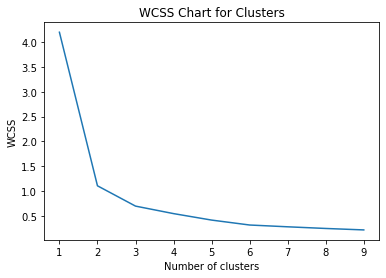

In [35]:
# Plot the elbow chart
fig, ax = plt.subplots()
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('WCSS Chart for Clusters')
plt.show()

fig.savefig('WCSS Chart for Clusters.png')

The above elbow chart (WCSS Chart) shows that the number of optimized clusters for the dataset is four (4).

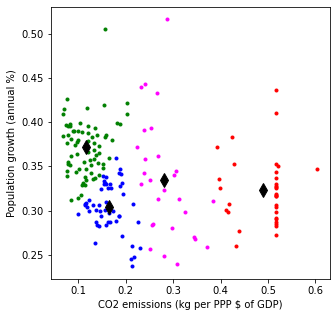

In [36]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = KMeans(n_clusters=4)

# extract columns for fitting
df_fit = data_country[["CO2 emissions (kg per PPP $ of GDP)", "Population growth (annual %)",]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_fit["CO2 emissions (kg per PPP $ of GDP)"][labels==l], df_fit["Population growth (annual %)"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("CO2 emissions (kg per PPP $ of GDP)")
plt.ylabel("Population growth (annual %)")
plt.show()



In [37]:
# Create a column for the matching clusters

df_fit['Cluster']= labels
df_fit.head()

,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %),Cluster
0,0.265380,0.433290,3
1,0.134975,0.263823,0
2,0.152289,0.352184,2
3,0.517478,0.304159,1
4,0.517478,0.330258,1


In [38]:
# Merge the clustered data with the original data

final_data = data_country.merge(df_fit, on=['CO2 emissions (kg per PPP $ of GDP)','Population growth (annual %)',])
final_data.head()

,Country Name,Region,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %),Cluster
0,Afghanistan,Asia,0.265380,0.433290,3
1,Albania,Europe,0.134975,0.263823,0
2,Algeria,Africa,0.152289,0.352184,2
3,American Samoa,Oceania,0.517478,0.304159,1
4,Andorra,Europe,0.517478,0.330258,1


In [39]:
final_data = final_data[['Country Name', 'Region', 'CO2 emissions (kg per PPP $ of GDP)', 'Population growth (annual %)', 'Cluster']]
final_data.head()

,Country Name,Region,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %),Cluster
0,Afghanistan,Asia,0.265380,0.433290,3
1,Albania,Europe,0.134975,0.263823,0
2,Algeria,Africa,0.152289,0.352184,2
3,American Samoa,Oceania,0.517478,0.304159,1
4,Andorra,Europe,0.517478,0.330258,1


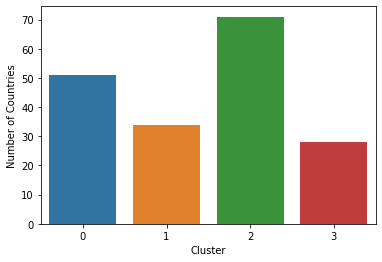

In [40]:
fig, ax = plt.subplots()

sns.countplot(final_data['Cluster'])
plt.ylabel('Number of Countries')
plt.xlabel('Cluster')
plt.show()

fig.savefig('Cluster Count Plot.png')

In [41]:
final_data.Cluster.value_counts()

2    71
0    51
1    34
3    28
Name: Cluster, dtype: int64

There are 51 countries in cluster 1 (0), 35 in cluster 2 (1), 71 in cluster 3 (2) and 27 in cluster 4 (3).

In [42]:
# Correlation

corr = df_fit.drop('Cluster', axis=1).corr()
corr

,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
CO2 emissions (kg per PPP $ of GDP),1.000000,-0.257588
Population growth (annual %),-0.257588,1.000000


Per unit increment in annual population growth, there is a decrement in CO2 emission across countries by over 25%

# Breakdown by Cluster

### Cluster 1

In [43]:
c_1 = final_data[final_data['Cluster']==0]
c_1.head()

,Country Name,Region,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %),Cluster
1,Albania,Europe,0.134975,0.263823,0
6,Antigua and Barbuda,Americas,0.152394,0.339222,0
7,Argentina,Americas,0.147346,0.324762,0
8,Armenia,Asia,0.229020,0.257638,0
11,Austria,Europe,0.136862,0.300638,0


In [44]:
c_1.Region.value_counts()

Europe      23
Americas    12
Asia         7
Oceania      5
Africa       4
Name: Region, dtype: int64

In cluster 1, there 23 countries from Europe, 15 from the Americas, 12 from Asia, 6 from Africa and Oceania each.

In [45]:
c_1.describe()

,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %),Cluster
count,51.000000,51.000000,51.0
mean,0.164007,0.303614,0.0
std,0.031779,0.027563,0.0
min,0.100131,0.236786,0.0
25%,0.143768,0.287351,0.0
50%,0.159090,0.304299,0.0
75%,0.186527,0.327011,0.0
max,0.229020,0.359336,0.0


In [46]:
corr = c_1.drop('Cluster', axis=1).corr()
corr

,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
CO2 emissions (kg per PPP $ of GDP),1.000000,-0.237302
Population growth (annual %),-0.237302,1.000000


For countries in cluster 1, per unit increase in annual poppulation growth, there is an increase in CO2 emission by 24%.

### Cluster 2

In [47]:
c_2 = final_data[final_data['Cluster']==1]
c_2.head()

,Country Name,Region,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %),Cluster
3,American Samoa,Oceania,0.517478,0.304159,1
4,Andorra,Europe,0.517478,0.330258,1
9,Aruba,Americas,0.517478,0.352382,1
12,Azerbaijan,Asia,0.398472,0.325192,1
20,Bermuda,Americas,0.517478,0.291024,1


In [48]:
c_2.Region.value_counts()

Europe      9
Americas    9
Oceania     7
Asia        6
Africa      3
Name: Region, dtype: int64

In cluster 1, there 9 countries from Europe and Americas each, 7 from Oceania and Asia each, while only 3 are from Africa.

In [49]:
c_2.describe()

,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %),Cluster
count,34.000000,34.000000,34.0
mean,0.490187,0.323094,1.0
std,0.051564,0.038192,0.0
min,0.393035,0.259855,1.0
25%,0.434077,0.298859,1.0
50%,0.517478,0.318049,1.0
75%,0.517478,0.341660,1.0
max,0.603346,0.436098,1.0


In [50]:
corr = c_2.drop('Cluster', axis=1).corr()
corr

,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
CO2 emissions (kg per PPP $ of GDP),1.000000,0.024517
Population growth (annual %),0.024517,1.000000


For countries in cluster 2, per unit increase in annual poppulation growth, there is an increase in CO2 emission by 4%. This indicates that CO2 emission is lesser in countries in cluster 2 as compared with countries in cluster 1.

### Cluster 3

In [51]:
c_3 = final_data[final_data['Cluster']==2]
c_3.head()

,Country Name,Region,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %),Cluster
2,Algeria,Africa,0.152289,0.352184,2
5,Angola,Africa,0.118670,0.416072,2
14,Bangladesh,Asia,0.094022,0.343724,2
18,Belize,Americas,0.170604,0.379955,2
19,Benin,Africa,0.102999,0.399121,2


In [52]:
c_3.Region.value_counts()

Africa      33
Asia        20
Americas    13
Oceania      4
Europe       1
Name: Region, dtype: int64

In cluster 3, there 31 countries from Africa, 14 from Asia, 9 from the Americas, 3 from Oceania, while there's none from Europe.

In [53]:
c_3.describe()

,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %),Cluster
count,71.000000,71.000000,71.0
mean,0.116438,0.371879,2.0
std,0.033029,0.031710,0.0
min,0.068124,0.312307,2.0
25%,0.087088,0.349455,2.0
50%,0.114862,0.373634,2.0
75%,0.136608,0.390292,2.0
max,0.202754,0.505131,2.0


In [54]:
corr = c_3.drop('Cluster', axis=1).corr()
corr

,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
CO2 emissions (kg per PPP $ of GDP),1.00000,0.16013
Population growth (annual %),0.16013,1.00000


For countries in cluster 2, per unit increase in annual population growth, there is a decrease in CO2 emission by 9%.

### Cluster 4

In [55]:
c_4 = final_data[final_data['Cluster']==3]
c_4.head()

,Country Name,Region,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %),Cluster
0,Afghanistan,Asia,0.265380,0.433290,3
10,Australia,Oceania,0.251930,0.334976,3
13,Bahrain,Asia,0.240317,0.443005,3
16,Belarus,Europe,0.344989,0.269992,3
22,Bosnia and Herzegovina,Europe,0.309045,0.239505,3


In [56]:
c_4.Region.value_counts()

Europe      9
Africa      8
Asia        7
Oceania     2
Americas    2
Name: Region, dtype: int64

In cluster 4, there 10 countries from Europe, 8 from Africa, 7 from Asia, 3 from the Americas, and 2 from Oceania.

In [57]:
c_4.describe()

,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %),Cluster
count,28.000000,28.000000,28.0
mean,0.280892,0.333950,3.0
std,0.043829,0.067443,0.0
min,0.223681,0.239505,3.0
25%,0.249027,0.282665,3.0
50%,0.268118,0.326323,3.0
75%,0.307326,0.364495,3.0
max,0.384412,0.516082,3.0


In [58]:
corr = c_4.drop('Cluster', axis=1).corr()
corr

,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
CO2 emissions (kg per PPP $ of GDP),1.000000,-0.448005
Population growth (annual %),-0.448005,1.000000


For countries in cluster 4, per unit increase in annual poppulation growth, there is an increase in CO2 emission by 5%.

### Summary

From the above analysis, we found that per unit increment in annual population growth, countries in cluster had more CO2 emission, while countries in cluster 3 had the least CO2 emission. This indicates that there are more activities that leades to CO2 emission in countries in cluster 1 than every other cluster, while activites that could lead to CO2 emission are fast declining in countries in cluster 3.

## Comparison of selected countries (from each cluster)

In [59]:
# Create a dataframe containing only the first country in each cluster

df_comparison = data_1[(data_1['Country Name']=='Angola') | (data_1['Country Name']=='American Samoa') | (data_1['Country Name']=='Afghanistan') | (data_1['Country Name']=='Albania')]
df_comparison.head()

,Country Name,Country Code,Region,Sub-Region,Year,CO2 emissions (kg per PPP $ of GDP),Population growth (annual %)
5520,Afghanistan,AFG,Asia,Southern Asia,1990,0.517478,0.463091
5521,Albania,ALB,Europe,Southern Europe,1990,0.281249,0.352793
5523,American Samoa,ASM,Oceania,Polynesia,1990,0.517478,0.407420
5525,Angola,AGO,Africa,Sub-Saharan Africa,1990,0.063426,0.417843
5704,Afghanistan,AFG,Asia,Southern Asia,1991,0.517478,0.562899


In [60]:
df_comparison.Region.nunique()

4

In [61]:
df_comparison.Region.value_counts()

Asia       32
Europe     32
Oceania    32
Africa     32
Name: Region, dtype: int64

We found the picked countries each belongs to 4 unique regions.

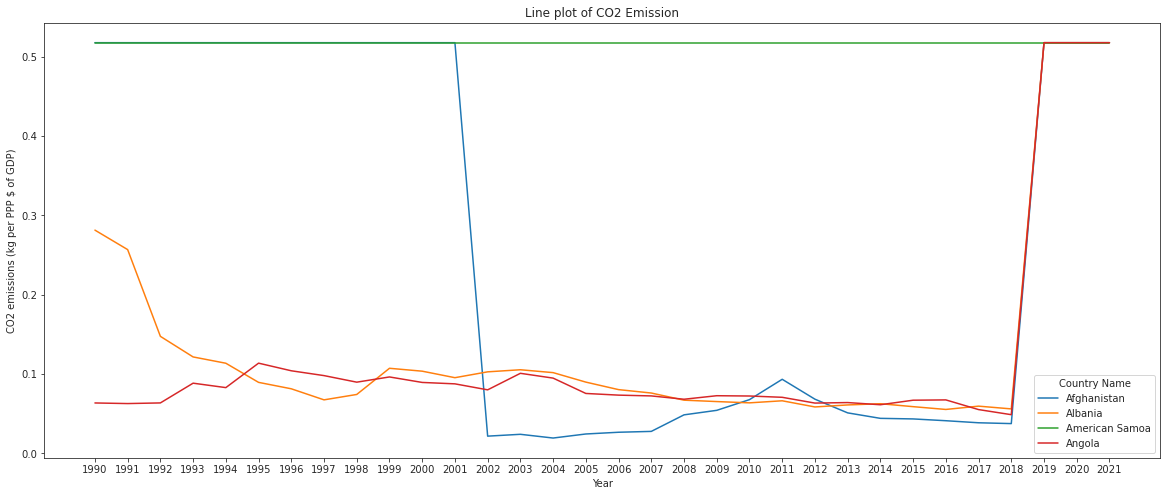

In [62]:
# Line Plot of CO2 Emission

sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20.00, 8.00)

sns.lineplot(x='Year', y='CO2 emissions (kg per PPP $ of GDP)', hue='Country Name', data=df_comparison)
plt.title('Line plot of CO2 Emission')
sns.despine

fig.savefig('Line plot of CO2 Emission.png')

From the above chart, we observed that between the year 1990 and year 2021;

1. CO2 emission in Angola has been on the increase, with an all-high value for the first time in the year 2018, whule maining a uniform growth pattern in the year 2021.

2. CO2 emission in American Samoa has steady over the years.

3. CO2 emission in Afghanistan experience as sharp in the year 2002, and has since then maintained a relatively low value as compared with pre-2002 values.

4. CO2 emission in Albania has maintained a steady drop over the years.